# Thiết lập môi trường

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.pardir))

# Thêm đường dẫn gốc vào sys.path nếu chưa có
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã nhận chưa
print(f"Project Root: {project_root}")

Project Root: d:\University\HK7\IT_Project\Project\Source


# Khai báo thư viện

In [7]:
import pandas as pd
from utils.config import *
from utils.supporter import *
from data.datasets import *
from engine.trainer import Trainer
from engine.evaluator import *
from engine.inference import *

# Khởi tạo cấu hình

In [3]:
spatial_cfg = TrainingConfig('spatial', 'efficientnet')
# spatial_cfg.OUTPUT_DIR = os.path.join(os.path.join(PathConfig.BASE_DIR, 'Outputs'), spatial_cfg.MODEL_NAME)

freq_cfg = TrainingConfig('frequency', 'frequency')

hybrid_cfg = TrainingConfig('hybrid', 'efficientnet_fft')


config_list = [spatial_cfg, freq_cfg, hybrid_cfg]

# Tải các mô hình

In [4]:
def load_models(configs: list):
    models_data = []

    for cfg in configs:
        print(f"\t=====Creating Model {cfg.MODEL_NAME}=====")
        model = build_model(cfg)
        model, info = load_weights(model, cfg)
        print(info)
        print()

        models_data.append({
            'name': cfg.MODEL_NAME,
            'model': model,
            'config': cfg
        })

    return models_data

MODELS_LIST = load_models(config_list)

	=====Creating Model efficientnet=====
🛠️ Building Model | Mode: spatial | Device: cuda
🔄 Loading weights from: ..\..\Outputs\efficientnet\checkpoints\best_model.pth


d:\University\HK7\IT_Project\Project\Source\utils\supporter.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=config

✅ Weights loaded successfully!
{'epoch': 9, 'metrics': {'loss': 0.00046727439809230066, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}}

	=====Creating Model frequency=====
🛠️ Building Model | Mode: frequency | Device: cuda
🔄 Loading weights from: ..\..\Outputs\frequency\checkpoints\best_model.pth
✅ Weights loaded successfully!
{'epoch': 9, 'metrics': {'loss': 0.1455481334048654, 'accuracy': 0.9480060575466935, 'precision': 0.9553941908713693, 'recall': 0.9388379204892966, 'f1': 0.9470437017994858}}

	=====Creating Model efficientnet_fft=====
🛠️ Building Model | Mode: hybrid | Device: cuda
🔄 Loading weights from: ..\..\Outputs\efficientnet_fft\checkpoints\best_model.pth
✅ Weights loaded successfully!
{'epoch': 9, 'metrics': {'loss': 6.007785370434982e-05, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}}



# Kiểm tra

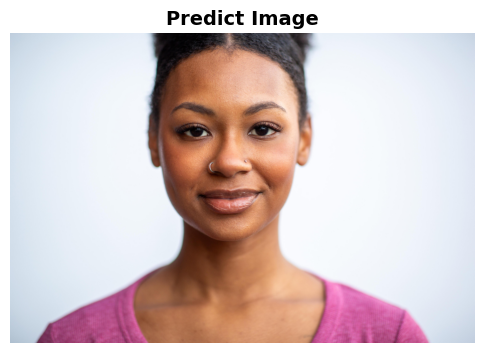

MODEL NAME                | PREDICTION   | CONFIDENCE   | FAKE PROB   
---------------------------------------------------------------------------
efficientnet              | REAL         | 99.98%       | 0.02%       
frequency                 | AI           | 82.70%       | 82.70%      
efficientnet_fft          | REAL         | 100.00%      | 0.00%       
---------------------------------------------------------------------------


In [5]:
test_image_path = r'D:\University\HK7\IT_Project\Project\licensed-image.jpg'

results_data = predict_image(MODELS_LIST, test_image_path)

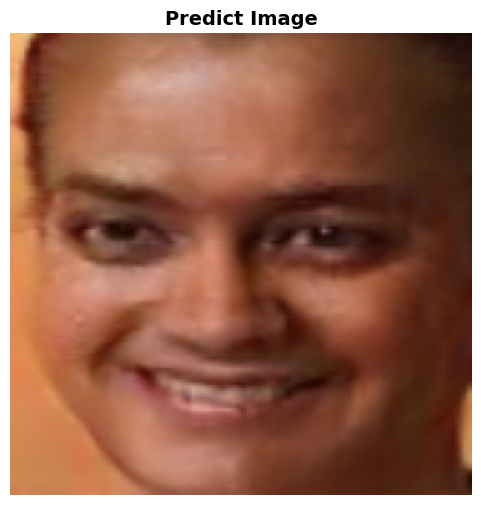

MODEL NAME                | PREDICTION   | CONFIDENCE   | FAKE PROB   
---------------------------------------------------------------------------
efficientnet              | AI           | 100.00%      | 100.00%     
frequency                 | AI           | 100.00%      | 100.00%     
efficientnet_fft          | AI           | 100.00%      | 100.00%     
---------------------------------------------------------------------------


In [6]:
test_image_path = r'D:\University\HK7\IT_Project\Project\Datasets\AI_Generated\MMD_GAN_000036.jpg'

results_data = predict_image(MODELS_LIST, test_image_path)

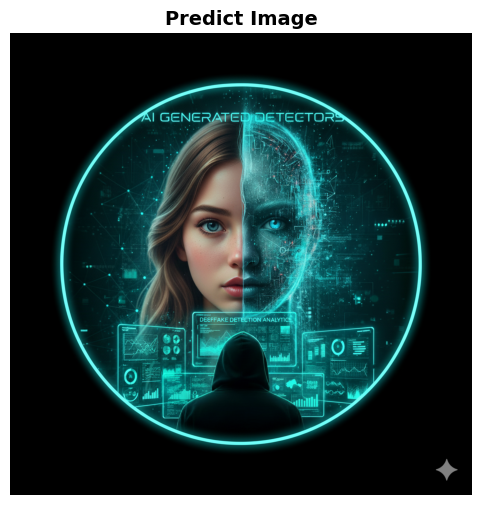

MODEL NAME                | PREDICTION   | CONFIDENCE   | FAKE PROB   
---------------------------------------------------------------------------
efficientnet              | REAL         | 83.92%       | 16.08%      
frequency                 | REAL         | 100.00%      | 0.00%       
efficientnet_fft          | REAL         | 100.00%      | 0.00%       
---------------------------------------------------------------------------


In [7]:
test_image_path = r'D:\University\HK7\IT_Project\Project\Gemini_Generated_Image_cra657cra657cra6.png'

results_data = predict_image(MODELS_LIST, test_image_path)

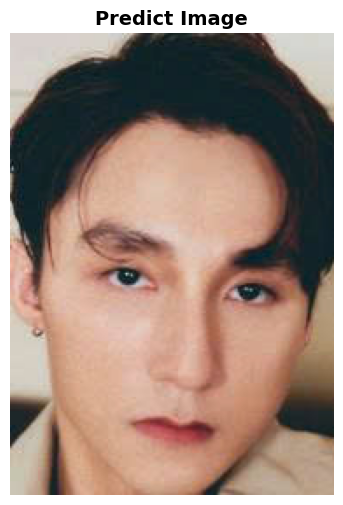

MODEL NAME                | PREDICTION   | CONFIDENCE   | FAKE PROB   
---------------------------------------------------------------------------
efficientnet              | AI           | 100.00%      | 100.00%     
frequency                 | AI           | 94.84%       | 94.84%      
efficientnet_fft          | AI           | 100.00%      | 100.00%     
---------------------------------------------------------------------------


In [8]:
test_image_path = r'D:\University\HK7\IT_Project\Project\my_husban.jpg'

results_data = predict_image(MODELS_LIST, test_image_path)

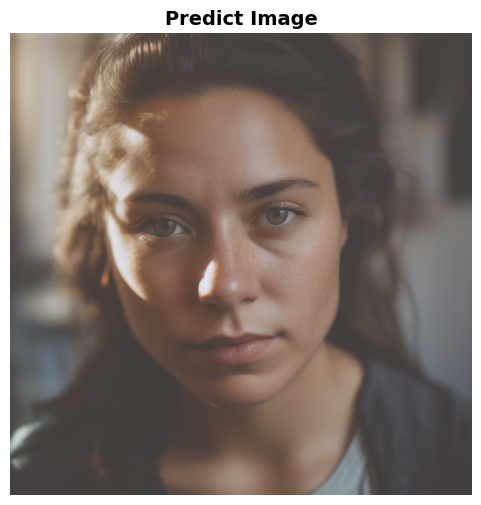

MODEL NAME                | PREDICTION   | CONFIDENCE   | FAKE PROB   
---------------------------------------------------------------------------
efficientnet              | REAL         | 100.00%      | 0.00%       
frequency                 | AI           | 73.93%       | 73.93%      
efficientnet_fft          | REAL         | 100.00%      | 0.00%       
---------------------------------------------------------------------------


In [6]:
test_image_path = r'D:\University\HK7\IT_Project\Project\fake_0000.png'

results_data = predict_image(MODELS_LIST, test_image_path)

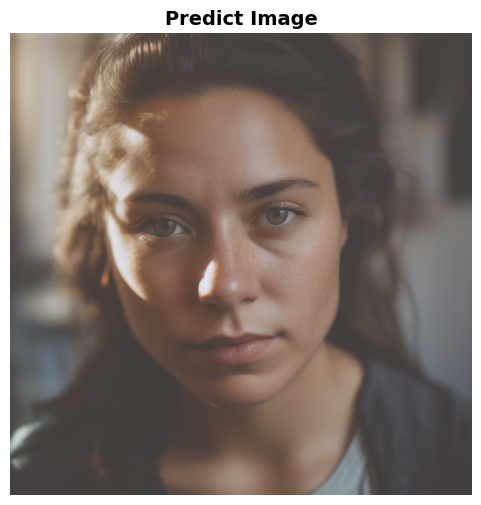

Spatial Weight: 1.0000
Frequency Weight: 0.0944



In [15]:
hybrid_model = MODELS_LIST[2]['model']
img_tensor = preprocess_image(r'D:\University\HK7\IT_Project\Project\fake_0000.png', 
                                hybrid_cfg.IMG_SIZE, hybrid_cfg.DEVICE)

spatial_w, freq_w = hybrid_model.get_feature_importance(img_tensor)
print(f"Spatial Weight: {spatial_w.mean().item():.4f}")
print(f"Frequency Weight: {freq_w.mean().item():.4f}\n")